# Analisis Exploratorio

## Hoja de Trabajo 1

 - Manuel Rodas 21509
 - Jose Santisteban 21153

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
datos = pd.read_csv('movies.csv')
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values



In [4]:
datos.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354,98,FALSE,...,20.880,1995-12-09,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938,110,FALSE,...,9.596,1993-10-15,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007,121,NaN,...,100.003,1977-05-25,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536,100,NaN,...,134.435,2003-05-30,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716,142,FALSE,...,58.751,1994-07-06,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


## Tipo de Variable

###### Id: cuantitativa discreta, popularity: cuantitativa continua
###### budget: cuantitativa continua, revenue: cuantitativa continua
###### original_title: cualitativa nominal, originalLanguage: cualitativa nominal
###### title: cualitativa nominal, homePage: cualitativa nominal
###### video: cualitativa nominal, director: cualitativa nominal
###### runtime: cuantitativa continua, genres: cualitativa nominal
###### genresAmount: cuantitativa discreta, productionCompany: cualitativa nominal
###### productionCoAmount: cuantitativa discreta, productionCompanyCountry: cualitativa nominal
###### productionCountry: cualitativa nominal, productionCountriesAmount: cuantitativa discreta
###### releaseDate: cualitativa nominal, voteCount: cuantitativa discreta
###### voteAvg: cuantitativa continua, actors: cualitativa nominal
###### actorsPopularity: cuantitativa continua, actorsCharacter: cualitativa nominal
###### actorsAmount: cuantitativa discreta, castWomenAmount: cuantitativa discreta
###### castMenAmount: cuantitativa discreta


- ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [25]:
datos['budget'] = pd.to_numeric(datos['budget'], errors='coerce')

datos = datos.dropna(subset=['budget'])

df_sorted = datos.sort_values(by='budget', ascending=False)

top_10_peliculas_presupuesto = df_sorted.head(10)

print(top_10_peliculas_presupuesto[['originalTitle', 'budget']])

                                    originalTitle       budget
716   Pirates of the Caribbean: On Stranger Tides  380000000.0
4711                      Avengers: Age of Ultron  365000000.0
5953                            Avengers: Endgame  356000000.0
4954                               Justice League  300000000.0
5954                       Avengers: Infinity War  300000000.0
163      Pirates of the Caribbean: At World's End  300000000.0
607                              Superman Returns  270000000.0
7135                                The Lion King  260000000.0
3792                                      Tangled  260000000.0
280                                  Spider-Man 3  258000000.0


Podemos observar como se nos muestra una lista que tiene los nombres de las peliculas que tuvieron un mayor presupuesto

- ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [26]:

datos['revenue'] = pd.to_numeric(datos['revenue'], errors='coerce')

datos = datos.dropna(subset=['revenue'])
datos_ordenados = datos.sort_values(by='revenue', ascending=False)
top_10_peliculas_ingresos = datos_ordenados.head(10)
print(top_10_peliculas_ingresos[['originalTitle', 'revenue']])

                     originalTitle     revenue
3211                        Avatar  2847246203
5953             Avengers: Endgame  2797800564
307                        Titanic  2187463944
4948  Star Wars: The Force Awakens  2068223624
5954        Avengers: Infinity War  2046239637
4915                Jurassic World  1671713208
7135                 The Lion King  1667635327
9050       Spider-Man: No Way Home  1631853496
3398                  The Avengers  1518815515
5088                     Furious 7  1515047671


Podemos osbservar una lista que contiene los nombres de las peliculas que tuvieron un mayor ingreso al resto

- ¿Cuál es la película que más votos tuvo?

In [32]:

datos['voteCount'] = pd.to_numeric(datos['voteCount'], errors='coerce')
datos = datos.dropna(subset=['voteCount'])


datos_ordenados_por_votos = datos.sort_values(by='voteCount', ascending=False)
pelicula_mas_votada = datos_ordenados_por_votos.iloc[0]
print("La película con más votos es:", pelicula_mas_votada['originalTitle'])
print("Número de votos:", pelicula_mas_votada['voteCount'])

La película con más votos es: Inception
Número de votos: 30788.0


- ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?

In [33]:
datos['voteCount'] = pd.to_numeric(datos['voteCount'], errors='coerce')
datos = datos.dropna(subset=['voteCount'])


datos_ordenados_por_votos = datos.sort_values(by='voteCount', ascending=True)
pelicula_menos_votada = datos_ordenados_por_votos.iloc[0]
print("La película con menos votos (la peor pelicula):", pelicula_menos_votada['originalTitle'])
print("Número de votos:", pelicula_menos_votada['voteCount'])

La película con menos votos (la peor pelicula): Steven Universe: The Movie: Behind the Curtain
Número de votos: 1.0


- ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más
películas?

Número de películas por año:
1902      1
1920      1
1921      1
1922      1
1925      2
       ... 
2018    629
2019    612
2020    533
2021    816
2022      7
Name: releaseDate, Length: 99, dtype: int64

Año con más películas: 2021 con 816 películas


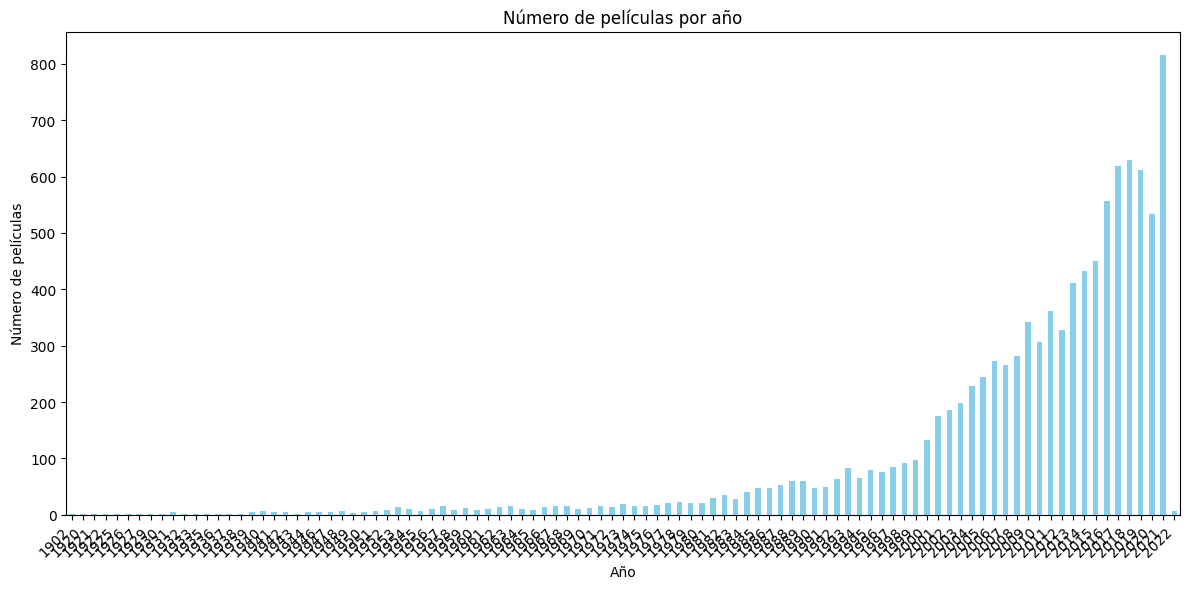

In [35]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'])
movies_per_year = datos['releaseDate'].dt.year.value_counts().sort_index()


max_movies_year = movies_per_year.idxmax()
max_movies_count = movies_per_year.max()


print("Número de películas por año:")
print(movies_per_year)
print("\nAño con más películas:", max_movies_year, "con", max_movies_count, "películas")


plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de películas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En el grafico podemos observar como a lo largo de los años se fueron creando mas peliculas, ademas podemos ver que en el 2021 hubo una pequeña bajada, la cual podemos explicar por la llegada de la pandemia COVID-19  

- ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género
principal que predomina en el conjunto de datos? 

Género principal de las 20 películas más recientes: Comedy
Género principal que predomina en todo el conjunto de datos: Drama


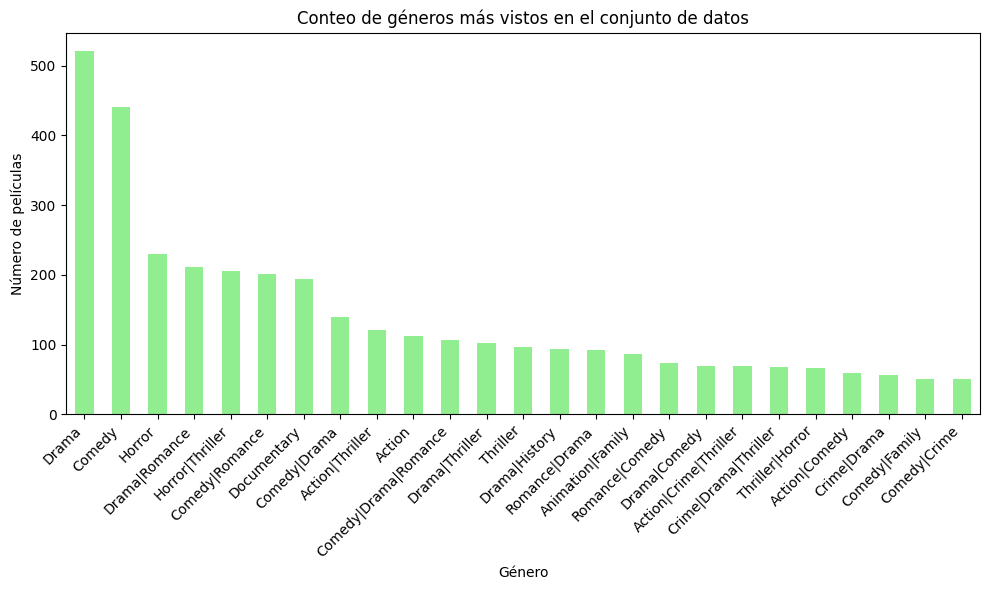

In [40]:

datos['releaseDate'] = pd.to_datetime(datos['releaseDate'])

num_min_peliculas = 50

peliculas_mas_recientes = datos.sort_values(by='releaseDate', ascending=False).head(20)

genero_principal_recientes = peliculas_mas_recientes['genres'].str.split(',').explode().mode()[0]

genero_principal_total = datos['genres'].str.split(',').explode().mode()[0]
print("Género principal de las 20 películas más recientes:", genero_principal_recientes)
print("Género principal que predomina en todo el conjunto de datos:", genero_principal_total)


genero_counts = datos['genres'].str.split(',').explode().value_counts()
generos_mas_vistos = genero_counts[genero_counts >= num_min_peliculas]

plt.figure(figsize=(10, 6))
generos_mas_vistos.plot(kind='bar', color='lightgreen')
plt.title('Conteo de géneros más vistos en el conjunto de datos')
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- ¿Las películas de qué genero principal obtuvieron mayores ganancias?

                                      revenue
genres                                       
Action|Adventure|Science Fiction  19780390887
Comedy                            17074165367
Comedy|Romance                    13775242729
Drama                             12771394567
Action|Adventure|Fantasy          11540955567


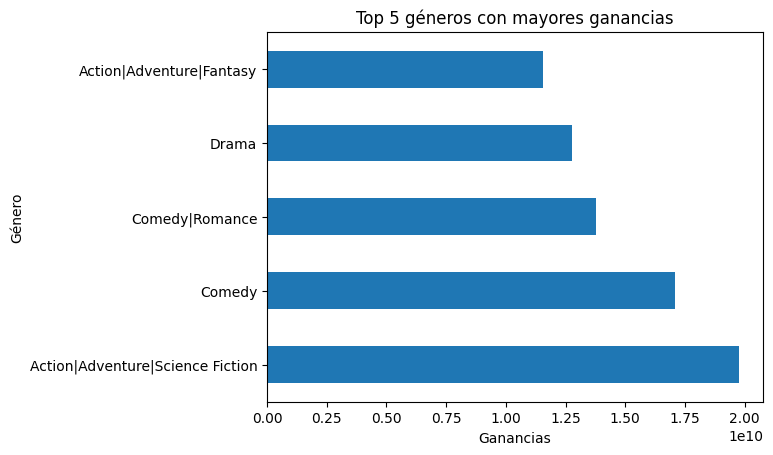

In [7]:

ganancias_por_genero = datos.groupby('genres')[['revenue']].sum()

ganancias_por_genero = ganancias_por_genero.sort_values(by='revenue', ascending=False)

print(ganancias_por_genero.head())

ax = ganancias_por_genero.head().plot(kind='barh', legend=False)
ax.set_ylabel("Género")
ax.set_xlabel("Ganancias")
ax.set_title("Top 5 géneros con mayores ganancias")
plt.show()

- ¿La cantidad de actores influye en los ingresos de las películas?¿se han hecho películas con más actores en los últimos años?

In [26]:
# Sumar la cantidad de actrices y actores para obtener el total de actores
datos['totalActors'] = datos['castWomenAmount'] + datos['castMenAmount']

# Identificar filas con valores no numéricos en la columna totalActors
valores_no_numericos = datos[pd.to_numeric(datos['totalActors'], errors='coerce').isna()]

print("Filas con valores no numéricos en la columna totalActors:")
print(valores_no_numericos)

Filas con valores no numéricos en la columna totalActors:
Empty DataFrame
Columns: [id, budget, genres, homePage, productionCompany, productionCompanyCountry, productionCountry, revenue, runtime, video, director, actors, actorsPopularity, actorsCharacter, originalTitle, title, originalLanguage, popularity, releaseDate, voteAvg, voteCount, genresAmount, productionCoAmount, productionCountriesAmount, actorsAmount, castWomenAmount, castMenAmount, totalActors]
Index: []

[0 rows x 28 columns]


In [25]:

# Sumar la cantidad de actrices y actores para obtener el total de actores
datos['totalActors'] = datos['castWomenAmount'] + datos['castMenAmount']

# Eliminar filas con valores no numéricos en la columna totalActors
datos = datos[pd.to_numeric(datos['totalActors'], errors='coerce').notna()]


releaseYear
1902    2.300000e+01
1920    2.700000e+01
1921    7.130000e+02
1922    4.900000e+01
1925    3.130000e+02
            ...     
2018    1.599522e+05
2019    2.538892e+05
2020    3.583593e+05
2021    2.717315e+05
2022    3.947316e+06
Name: totalActors, Length: 99, dtype: float64


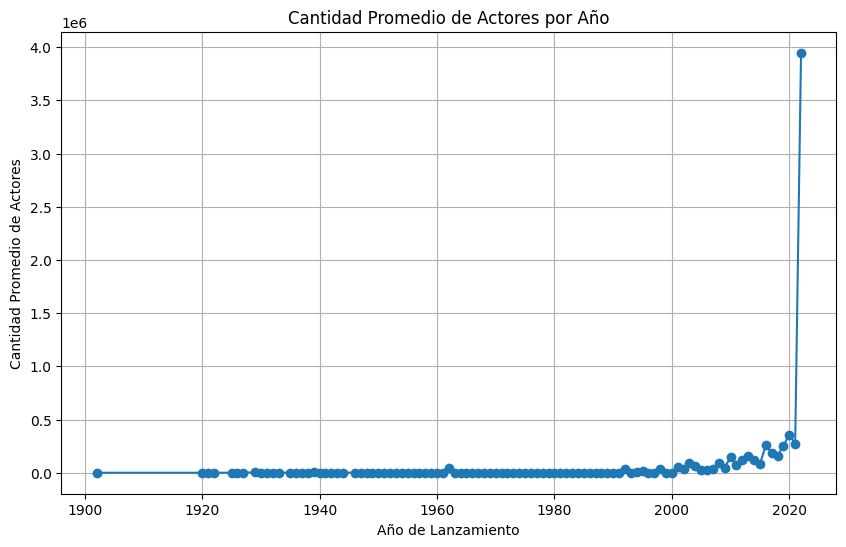

In [32]:

# Sumar la cantidad de actrices y actores para obtener el total de actores
datos['totalActors'] = datos['castWomenAmount'] + datos['castMenAmount']

# Limpiar la columna totalActors
datos = datos[pd.to_numeric(datos['totalActors'], errors='coerce').notna()]

datos['releaseDate'] = pd.to_datetime(datos['releaseDate'])

datos['releaseYear'] = datos['releaseDate'].dt.year

datos['totalActors'] = datos['totalActors'].astype(float)

promedio_actores_por_año = datos.groupby('releaseYear')['totalActors'].mean()

print(promedio_actores_por_año)


# Graficar la cantidad promedio de actores por año
plt.figure(figsize=(10, 6))
plt.plot(promedio_actores_por_año.index, promedio_actores_por_año.values, marker='o', linestyle='-')
plt.title('Cantidad Promedio de Actores por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad Promedio de Actores')
plt.grid(True)
plt.show()


In [31]:

datos['totalActors'] = datos['castWomenAmount'] + datos['castMenAmount']

datos['revenue'] = pd.to_numeric(datos['revenue'], errors='coerce')

datos = datos.dropna(subset=['revenue'])

correlacion = datos['totalActors'].corr(datos['revenue'])
print("Correlación entre cantidad total de actores y ingresos:", correlacion)

Correlación entre cantidad total de actores y ingresos: -0.046434830667074094


Esta correlación negativa indica que hay una relación débil entre estas dos variables y que tienden a moverse en direcciones opuestas, aunque la relación es muy cercana a cero, lo que sugiere que no hay una asociación lineal significativa entre la cantidad total de actores y los ingresos de las películas.

- ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?


In [35]:
#Limpieza de datos
# Eliminar filas con valores no válidos en las columnas de interés
datos_limpios = datos.dropna(subset=['castWomenAmount', 'castMenAmount', 'popularity', 'revenue'])



In [36]:
correlacion_actrices_popularidad = datos['castWomenAmount'].corr(datos['popularity'])
print("Correlación entre cantidad de actrices en el elenco y popularidad:", correlacion_actrices_popularidad)

correlacion_actrices_ingresos = datos['castWomenAmount'].corr(datos['revenue'])
print("Correlación entre cantidad de actrices en el elenco y ingresos:", correlacion_actrices_ingresos)

correlacion_actores_popularidad = datos['castMenAmount'].corr(datos['popularity'])
print("Correlación entre cantidad de actores en el elenco y popularidad:", correlacion_actores_popularidad)

correlacion_actores_ingresos = datos['castMenAmount'].corr(datos['revenue'])
print("Correlación entre cantidad de actores en el elenco y ingresos:", correlacion_actores_ingresos)

Correlación entre cantidad de actrices en el elenco y popularidad: 0.0390358185652236
Correlación entre cantidad de actrices en el elenco y ingresos: 0.29032338531991214
Correlación entre cantidad de actores en el elenco y popularidad: 0.0027757026454538467
Correlación entre cantidad de actores en el elenco y ingresos: -0.06014493034418004


Correlación entre cantidad de actrices en el elenco y popularidad: 0.039
Esto sugiere una correlación muy débil y positiva entre la cantidad de actrices en el elenco y la popularidad de las películas. Esto podría indicar que, en promedio, películas con más actrices tienden a ser ligeramente más populares, pero la relación es bastante baja.

Correlación entre cantidad de actrices en el elenco y ingresos: 0.290
Esta correlación es más fuerte y positiva, sugiriendo que hay una relación moderada entre la cantidad de actrices en el elenco y los ingresos de las películas. En otras palabras, las películas con más actrices tienden a generar mayores ingresos en promedio.

Correlación entre cantidad de actores en el elenco y popularidad: 0.003
Esta correlación es muy cercana a cero, lo que sugiere que no hay una relación significativa entre la cantidad de actores en el elenco y la popularidad de las películas. En promedio, la cantidad de actores en el elenco no parece influir en la popularidad de las películas.

Correlación entre cantidad de actores en el elenco y ingresos: -0.060
Esta correlación es débil y negativa, indicando una relación ligeramente inversa entre la cantidad de actores en el elenco y los ingresos de las películas. Sin embargo, la correlación es baja, lo que sugiere que esta relación es débil y no muy significativa.

En resumen, según estas correlaciones, parece que la cantidad de actrices en el elenco puede tener una influencia moderada en los ingresos de las películas, mientras que la cantidad de actores en el elenco parece tener una relación más débil con la popularidad y los ingresos.

- ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?


In [57]:
datos_limpios = datos.dropna(subset=['director', 'voteAvg', 'voteCount', 'originalTitle'])

datos_limpios['weighted_avg_vote'] = (datos_limpios['voteAvg'] * datos_limpios['voteCount']) / (datos_limpios['voteCount'].sum())

datos_ordenados = datos_limpios.sort_values(by='weighted_avg_vote', ascending=False)

top_20_películas = datos_ordenados.head(20)

directores_top_20 = top_20_películas[['originalTitle', 'director']]

# Imprimir los nombres de los directores
print("Pelicula y Director de las 20 películas mejor calificadas (por promedio ponderado de votos):")
print(directores_top_20)



Pelicula y Director de las 20 películas mejor calificadas (por promedio ponderado de votos):
                                          originalTitle  \
3512                                          Inception   
5028                                       Interstellar   
87                                      The Dark Knight   
3398                                       The Avengers   
5890                                           Deadpool   
5954                             Avengers: Infinity War   
275                                          Fight Club   
374                                        Pulp Fiction   
4826                            Guardians of the Galaxy   
4                                          Forrest Gump   
3211                                             Avatar   
159                            The Shawshank Redemption   
4338                                   Django Unchained   
367            Harry Potter and the Philosopher's Stone   
313                   

C:\Users\jsken\AppData\Local\Temp\ipykernel_12084\1994626878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios['weighted_avg_vote'] = (datos_limpios['voteAvg'] * datos_limpios['voteCount']) / (datos_limpios['voteCount'].sum())


- ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

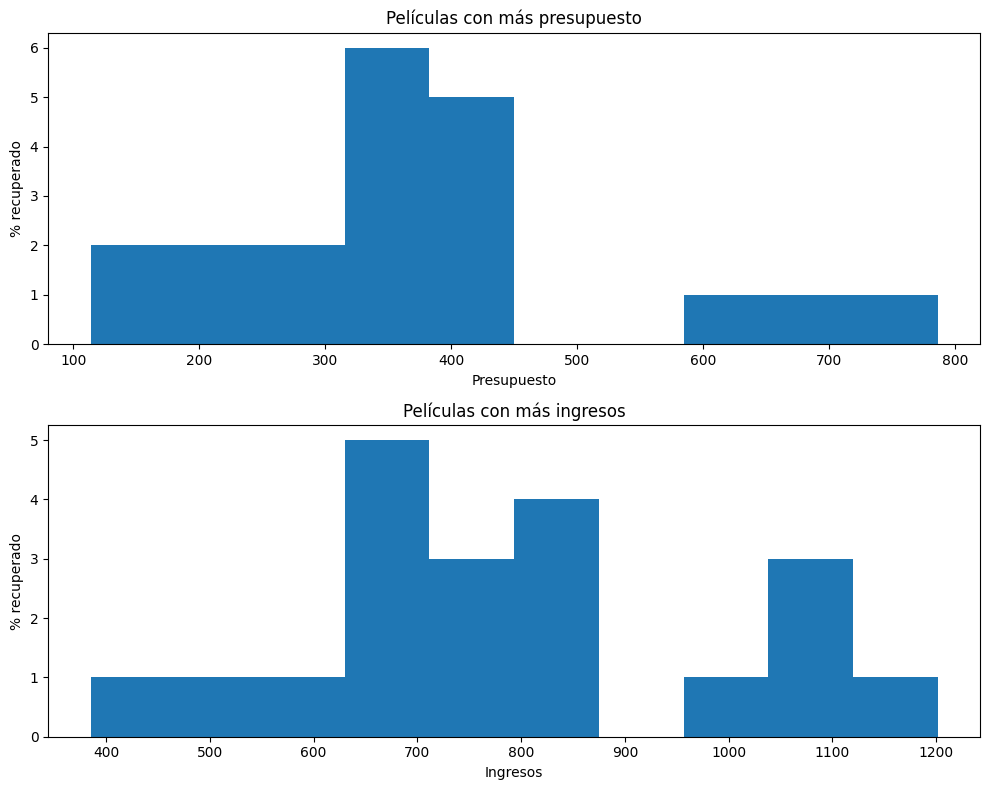

Correlación entre presupuesto e ingresos: 0.7568724241234926


In [79]:

datos_limpios = datos.dropna(subset=['budget', 'revenue'])

datos_limpios['budget'] = pd.to_numeric(datos_limpios['budget'], errors='coerce')
datos_limpios['revenue'] = pd.to_numeric(datos_limpios['revenue'], errors='coerce')

datos_limpios = datos_limpios.dropna(subset=['budget', 'revenue'])

df_comparativo = datos_limpios[['budget', 'revenue']].copy()
df_comparativo['% recuperado'] = (df_comparativo['revenue'] / df_comparativo['budget']) * 100

top_20_presupuesto = df_comparativo.nlargest(20, 'budget')



top_20_ingresos = df_comparativo.nlargest(20, 'revenue')


fig, axs = plt.subplots(2, figsize=(10, 8))

axs[0].hist(top_20_presupuesto['% recuperado'], bins=10)
axs[0].set_title('Películas con más presupuesto')
axs[0].set_ylabel('% recuperado')
axs[0].set_xlabel('Presupuesto')

axs[1].hist(top_20_ingresos['% recuperado'], bins=10)
axs[1].set_title('Películas con más ingresos')
axs[1].set_ylabel('% recuperado')
axs[1].set_xlabel('Ingresos')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

#correlacion entre presupuesto y ingresos
correlacion_presupuesto_ingresos = datos['budget'].corr(datos['revenue'])
print("Correlación entre presupuesto e ingresos:", correlacion_presupuesto_ingresos)




Una correlación de 0.756 indica una correlación positiva bastante fuerte entre el presupuesto y los ingresos de las películas. Esto significa que, en general, las películas con presupuestos más altos tienden a generar mayores ingresos. Sin embargo, es importante tener en cuenta que la correlación no implica causalidad, es decir, el hecho de que haya una correlación entre el presupuesto y los ingresos no significa necesariamente que un mayor presupuesto cause mayores ingresos.

Como se puede observar en los histogramas superiores se compara el presupuesto y los ingresos con el % recuperado de las 20 peliculas con mas ingresos y con más presupuesto, y como se puede observar, no necesariamente existe una relacion de entre más presupuesto más ingresos, ya que muchas peliculas ganan (o pierden) mucho más dinero del que se invierte, como puede observar en las siguientes tablas.

In [80]:
# Mostrar las primeras 20 películas con el mayor presupuesto
print("Películas con más presupuesto comparado con el % recuperado:")
print(top_20_presupuesto)

Películas con más presupuesto comparado con el % recuperado:
         budget     revenue  % recuperado
716   380000000  1045713802    275.187843
4711  365000000  1405403694    385.042108
5953  356000000  2797800564    785.899035
163   300000000   961000000    320.333333
4954  300000000   657924295    219.308098
5954  300000000  2046239637    682.079879
607   270000000   391081192    144.844886
3792  260000000   592461732    227.869897
7135  260000000  1667635327    641.398203
280   258000000   890871626    345.299080
411   250000000   933959197    373.583679
2509  250000000   954305868    381.722347
4035  250000000  1081041287    432.416515
4039  250000000  1021103568    408.441427
4052  250000000   284139100    113.655640
4179  250000000   958400000    383.360000
4856  250000000   956019788    382.407915
4881  250000000   747862775    299.145110
5150  250000000  1074144248    429.657699
5280  250000000   873634919    349.453968


In [81]:
# Mostrar las primeras 20 películas con el mayor ingreso
print("\nPelículas con más ingresos comparado con el % recuperado:")
print(top_20_ingresos)



Películas con más ingresos comparado con el % recuperado:
         budget     revenue  % recuperado
3211  237000000  2847246203   1201.369706
5953  356000000  2797800564    785.899035
307   200000000  2187463944   1093.731972
4948  245000000  2068223624    844.172908
5954  300000000  2046239637    682.079879
4915  150000000  1671713208   1114.475472
7135  260000000  1667635327    641.398203
9050  200000000  1631853496    815.926748
3398  220000000  1518815515    690.370689
5088  190000000  1515047671    797.393511
6181  150000000  1450026933    966.684622
4711  365000000  1405403694    385.042108
5799  200000000  1346739107    673.369553
2510  125000000  1341511219   1073.208975
5149  200000000  1332698830    666.349415
6429  170000000  1303459585    766.740932
4766  150000000  1274219009    849.479339
6109  160000000  1263521126    789.700704
5626  200000000  1242805359    621.402679
6272  250000000  1238764765    495.505906


¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

Ingresos Promedio por Mes de Lanzamiento:
releaseMonth
1     3.467787e+07
2     4.409502e+07
3     5.162267e+07
4     5.325777e+07
5     8.873534e+07
6     9.675546e+07
7     7.707279e+07
8     3.636842e+07
9     3.247051e+07
10    3.922223e+07
11    7.229841e+07
12    7.598421e+07
Name: revenue, dtype: float64


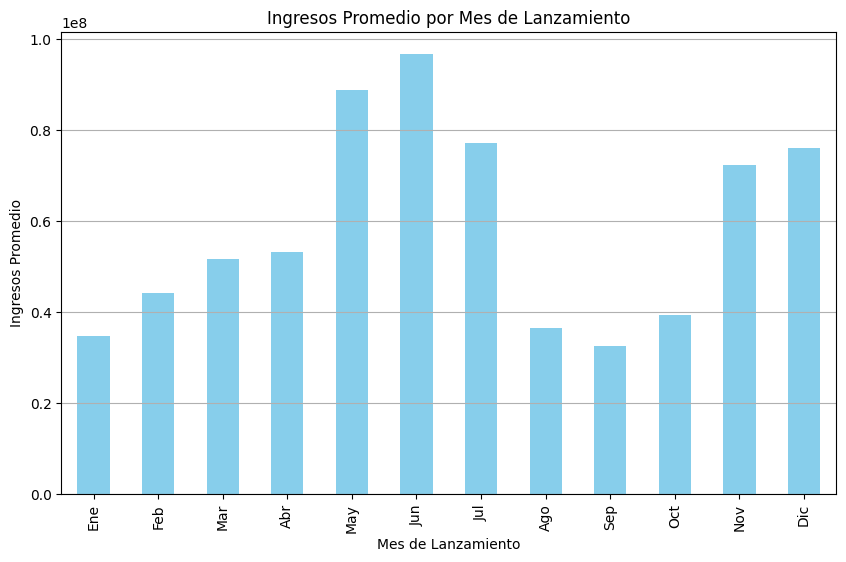

In [91]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'])

datos['releaseMonth'] = datos['releaseDate'].dt.month

ingresos_promedio_por_mes = datos.groupby('releaseMonth')['revenue'].mean()

print("Ingresos Promedio por Mes de Lanzamiento:")
print(ingresos_promedio_por_mes)

plt.figure(figsize=(10, 6))
ingresos_promedio_por_mes.plot(kind='bar', color='skyblue')
plt.title('Ingresos Promedio por Mes de Lanzamiento')
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Ingresos Promedio')
plt.xticks(range(0, 12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y')
plt.show()

In [90]:
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'])

datos['releaseMonth'] = datos['releaseDate'].dt.month

peliculas_mayo = datos[datos['releaseMonth'] == 6]

ingresos_promedio_mayo = peliculas_mayo['revenue'].mean()

peliculas_otros_meses = datos[datos['releaseMonth'] != 6]

ingresos_promedio_otros_meses = peliculas_otros_meses['revenue'].mean()

diferencia_ingresos = ingresos_promedio_mayo - ingresos_promedio_otros_meses

print("Ingreso promedio de películas lanzadas en junio:", ingresos_promedio_mayo)
print("Ingreso promedio de películas lanzadas en otros meses:", ingresos_promedio_otros_meses)
print("Diferencia de ingresos promedio:", diferencia_ingresos)

Ingreso promedio de películas lanzadas en mayo: 96755463.38778055
Ingreso promedio de películas lanzadas en otros meses: 54152245.149086885
Diferencia de ingresos promedio: 42603218.23869366


La diferencia de ingresos promedio entre las películas lanzadas en mayo y las lanzadas en otros meses es significativa, con un ingreso promedio notablemente mayor para las películas lanzadas en mayo en comparación con las lanzadas en otros meses.

¿En qué meses se han visto los lanzamientos con mejores ingresos?¿cuantas películas, en promedio, se han lanzado por mes?

Meses con los mejores ingresos: 6
Promedio de películas lanzadas por mes:
releaseDate
1      635
2      687
3      807
4      684
5      691
6      802
7      801
8      903
9     1061
10    1053
11     798
12     915
Name: count, dtype: int64


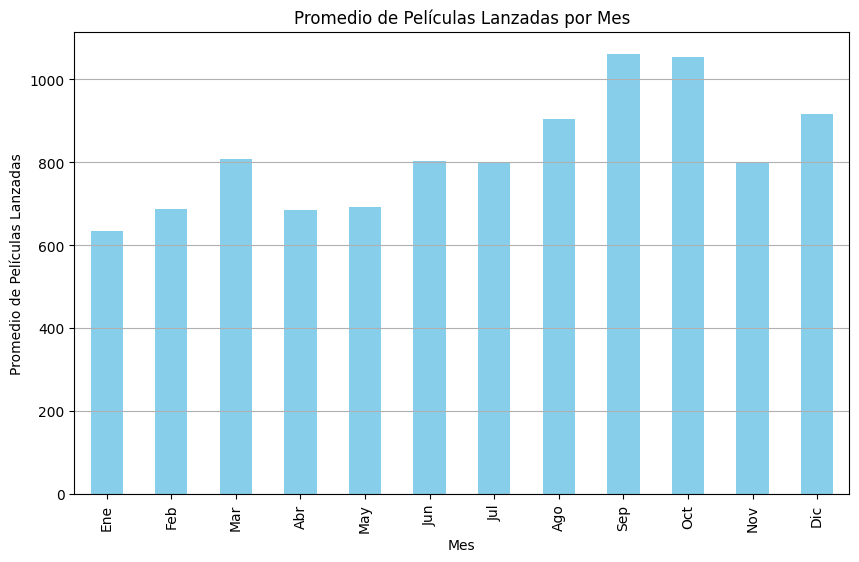

In [94]:

ingresos_por_mes = datos.groupby(datos['releaseDate'].dt.month)['revenue'].sum()


meses_mejores_ingresos = ingresos_por_mes.idxmax()

promedio_películas_por_mes = datos['releaseDate'].dt.month.value_counts().sort_index()

print("Meses con los mejores ingresos:", meses_mejores_ingresos)
print("Promedio de películas lanzadas por mes:")
print(promedio_películas_por_mes)

plt.figure(figsize=(10, 6))
promedio_películas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Promedio de Películas Lanzadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Películas Lanzadas')
plt.xticks(range(0, 12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y')
plt.show()




Basándonos en los datos proporcionados, podemos observar que el mes con los mejores ingresos es junio (mes 6). Además, al revisar el promedio de películas lanzadas por mes, vemos que septiembre (mes 9) y octubre (mes 10) tienen el mayor promedio de lanzamientos, seguido de diciembre (mes 12) y agosto (mes 8).

Una posible conclusión es que, aunque septiembre y octubre tienen un alto promedio de películas lanzadas, junio es el mes con los mejores ingresos, lo que sugiere que puede haber una mayor demanda de películas durante este período.

- ¿A qué género principal pertenecen las películas más largas?

In [8]:
datos_limpios = datos.dropna(subset=['genres', 'runtime'])

generos_separados = datos_limpios['genres'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)


duracion_por_genero = pd.concat([generos_separados, datos_limpios['runtime']], axis=1)
duracion_por_genero.columns = ['Genre', 'Runtime']

genero_pelis_mas_largas = duracion_por_genero.loc[duracion_por_genero['Runtime'].idxmax()]['Genre']

print(f"Las películas más largas pertenecen al género {genero_pelis_mas_largas}")

Las películas más largas pertenecen al género Thriller


- ¿A qué género principal pertenecen las películas más largas?

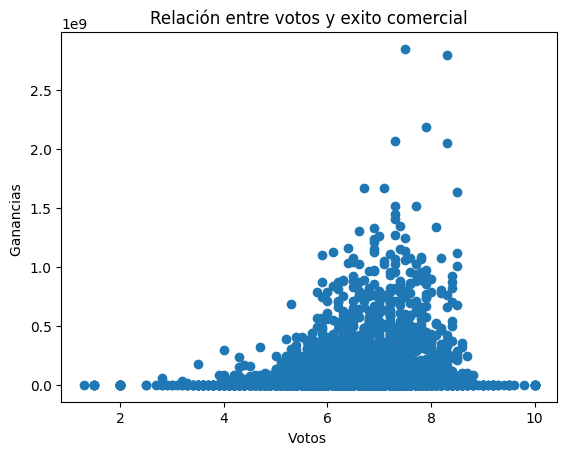

Coeficiente de correlación de Pearson: 0.14126438971337793


In [13]:

datos_limpios = datos.dropna(subset=['voteAvg', 'revenue'])


plt.scatter(datos_limpios['voteAvg'], datos_limpios['revenue'])
plt.xlabel('Votos ')
plt.ylabel('Ganancias ')
plt.title('Relación entre votos y exito comercial')
plt.show()

correlacion = datos_limpios['voteAvg'].corr(datos_limpios['revenue'])
print(f"Coeficiente de correlación de Pearson: {correlacion}")

Con esta correlacion mas acercada a 1 que a -1, podemos decir que entre mejor sea la calificacion de la pelicula mejor sera las ganancias, pero el resultado nos dicta que tampoco es algo seguro, ya que al ser la correlacion muy debil existe una ligera tendencia de que las películas con calificaciones más altas tiendan a tener un mayor éxito comercial, pero la relación no es muy fuerte y hay muchas otras variables que pueden influir en el éxito de una película en la taquilla.